In [ ]:
##################################################
# 1. keras 엔진을 활용하여 precision, recall 계산
##################################################

In [ ]:
#http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255
#1. keras metrics로 precision,recall custom정의
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall

def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision

def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

Using TensorFlow backend.


In [ ]:
#https://keras.io/examples/mnist_cnn/
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test_cate = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy', precision, recall, f1score])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_cate))

#score = model.evaluate(x_test, y_test_cate, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

_loss, _acc, _precision, _recall, _f1score = model.evaluate(x_test, y_test_cate, verbose=0)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.2649 - accuracy: 0.9189 - precision: 0.9375 - recall: 0.8943 - f1score: 0.9112 - val_loss: 0.0574 - val_accuracy: 0.9818 - val_precision: 0.9860 - val_recall: 0.9791 - val_f1score: 0.9825
Epoch 2/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0900 - accuracy: 0.9733 - precision: 0.9773 - recall: 0.9700 - f1score: 0.9736 - val_loss: 0.0435 - val_accuracy: 0.9856 - val_precision: 0.9873 - val_recall: 0.9840 - val_f1score: 0.9856
Epoch 3/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0659 - accuracy: 0.9804 - precision: 0.9831 - recall: 0.9780 - f1score: 0.9806 - val_loss: 0.0364 - val_accuracy: 0.9880 - val_precision: 0.9894 - val_recall: 0.9871 - val_f1score: 0.9883
Epoch 4/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0534 - accuracy: 0.9844 - precision: 0.9864 - recall: 0.9826 -

In [ ]:
##############################################################
# 2. sklearn 패키지를 이용하여 precision, recall, roc/auc 확인
##############################################################

In [ ]:
#https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/
#2-1. (binary class) sklearn 패키지로 좀더 친절하게 수치출력 및 표시
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

L_model = LogisticRegression().fit(X, y)
y_hat = L_model.predict(X)
f_value = L_model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

c_matrix = confusion_matrix(y, y_hat, labels=[1, 0])
print(c_matrix)
# 	          양성이라고 예측	                  음성이라고 예측
# 실제 양성 :	양성 예측이 맞음 (True Positive)	음성 예측이 틀림 (False Negative)
# 실제 음성 :	양성 예측이 틀림 (False Positive)	음성 예측이 맞음 (True Negative)

[[7 1]
 [1 7]]


In [ ]:
def get_matrics_info(c_matrix):
    #recall = TP / (TP + FN)
    TP = c_matrix[0][0]
    FN = c_matrix[0][1]
    recall= TP / (TP+FN)
    print('TP:',TP)
    print('FN:',FN)
    print('recall:',recall)

    #fallout= FP / (FP+TN)
    FP = c_matrix[1][0]
    TN = c_matrix[1][1]
    fallout= FP / (FP+TN)
    print('FP:',FP)
    print('TN:',TN)
    print('fallout:',fallout)
    return recall, fallout

y.shape: (16,)
y: [0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1]
pre_y_dec.shape: (16,)
pre_y_dec: [ 0.37829565  1.6336573  -1.42938156  1.21967832  2.06504666 -4.11896895
 -1.04677034 -1.21469968  1.62496692 -0.43866584 -0.92693183 -0.76588836
  0.09428499  1.62617134 -2.08158634  2.36316277]

[0.    0.    0.    0.125 0.125 0.375 0.375 1.   ] [0.    0.125 0.75  0.75  0.875 0.875 1.    1.   ] [ 3.36316277  2.36316277  1.21967832  0.37829565  0.09428499 -0.76588836
 -0.92693183 -4.11896895]
TP: 7
FN: 1
recall: 0.875
FP: 1
TN: 7
fallout: 0.125


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

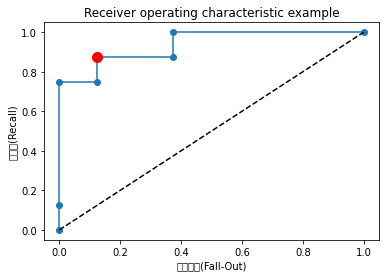

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def print_roc(y, pre_y, c_matrix):  
  fpr, tpr, thresholds = roc_curve(y, pre_y)
  print(fpr, tpr, thresholds)
  recall, fallout = get_matrics_info(c_matrix)
  
  plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
  plt.plot([0, 1], [0, 1], 'k--', label="random guess")
  plt.plot([fallout], [recall], 'ro', ms=10)
  plt.xlabel('위양성률(Fall-Out)')
  plt.ylabel('재현률(Recall)')
  plt.title('Receiver operating characteristic example')
  plt.show()

  return fpr, tpr

print('y.shape:', y.shape)
print('y:', y)
pre_y_dec = L_model.decision_function(X)
print('pre_y_dec.shape:', pre_y_dec.shape)
print('pre_y_dec:', pre_y_dec)
print()

fpr, tpr = print_roc(y, pre_y_dec, c_matrix)

In [ ]:
#모델이 여러개 있을때, AUC값이 1에 가까울수록  좋은 모형이다.
from sklearn.metrics import auc
print(auc(fpr, tpr))

0.9375


In [ ]:
#2-2. (multi-class) 개별 class 값을 추출->2-1의 방식으로 개별환산
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
print('iris.target.shape:', iris.target.shape)
print('iris.target[0]:', iris.target[0])
y = label_binarize(iris.target, [0, 1, 2])

print('X.shape:', X.shape)
print('X[0]:', X[0])
print('y.shape:', y.shape)
print('y[0]:', y[0])

print('y[:, 2]:', y[:, 2])

iris.target.shape: (150,)
iris.target[0]: 0
X.shape: (150, 4)
X[0]: [5.1 3.5 1.4 0.2]
y.shape: (150, 3)
y[0]: [1 0 0]
y[:, 2]: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


pre_proba.shape: (150, 2)
pre_proba[0]: [6.71160012e-10 9.99999999e-01]
pre_proba.shape: (150,)
pre_proba[0]: 0.99999999932884
i: 0  ,auc: 1.0
pre_proba.shape: (150, 2)
pre_proba[0]: [1.00000000e+00 8.32082778e-16]
pre_proba.shape: (150,)
pre_proba[0]: 8.320827776172383e-16
i: 1  ,auc: 0.9818
pre_proba.shape: (150, 2)
pre_proba[0]: [1.00000000e+00 1.45863603e-23]
pre_proba.shape: (150,)
pre_proba[0]: 1.458636025994255e-23
i: 2  ,auc: 0.989


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

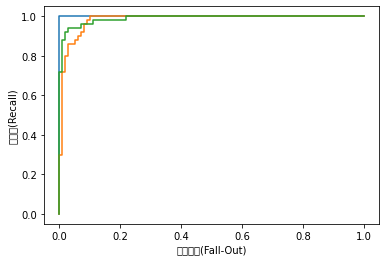

In [ ]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model_G = GaussianNB().fit(X, y[:, i])
    pre_proba = model_G.predict_proba(X) #model_G.predict_proba(X)[:, 1]
    print('pre_proba.shape:', pre_proba.shape)
    print('pre_proba[0]:', pre_proba[0])
    pre_proba = pre_proba[:, 1]
    print('pre_proba.shape:', pre_proba.shape)
    print('pre_proba[0]:', pre_proba[0])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], pre_proba)
    plt.plot(fpr[i], tpr[i])
    print('i:', i , ' ,auc:', auc(fpr[i], tpr[i]))

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

In [ ]:
######################################
# MNIST결과를 ROC에 적용(multi-calls)
######################################
import numpy as np

pre_y = model.predict(x_test)
#print(pre_y)
pre_y_argmax = np.argmax(pre_y, axis=-1)
print('pre_y_argmax[0]:', pre_y_argmax[0])
print(pre_y_argmax.shape)
print(y_test.shape)

label_bin = []
for idx in range(num_classes): #MNIST에서 정의한 class갯수(num_classes)
  label_bin.append(idx)

# #binary로 변환
# #y = label_binarize(pre_y_argmax, [0, 1, 2])
y_bin = label_binarize(pre_y_argmax, label_bin)
print('y_bin.shape:', y_bin.shape)
print('y_bin[0].shape:', y_bin[0].shape)
print('y_bin[:, 0].shape:', y_bin[:, 0].shape)
print('y_bin[0]:', y_bin[0])
print('y_bin[:, 0]:', y_bin[:, 0])
print('y_bin[:, 1]:', y_bin[:, 1])

# def getCategorical(val, num_classes):
#     return keras.utils.to_categorical(val, num_classes)

#label별로 data와 label을 따로 담는다
x_test_cls = []
x_cls_dic = {}
y_cls_dic = {}
for idx, label in enumerate(y_test):
    if label not in x_cls_dic: 
        x_cls_dic[label] =  [x_test[idx]]       
        y_cls_dic[label] =  [y_test[idx]] #binary로 변환
    else: 
        x_test_list = x_cls_dic[label]
        x_test_list.append(x_test[idx])
        y_test_list = y_cls_dic[label]
        y_test_list.append(y_test[idx]) #binary로 변환
for key in x_cls_dic.keys():
    print('key:', key, ' ,len:', len(x_cls_dic[key]), ' ,type:', type(x_cls_dic[key]))
    print('key:', key, ' ,len:', len(y_cls_dic[key]), ' ,type:', type(y_cls_dic[key]))
print(y_cls_dic[0][0])
print(y_cls_dic[0])

pre_y_argmax[0]: 7
(10000,)
(10000,)
y_bin.shape: (10000, 10)
y_bin[0].shape: (10,)
y_bin[:, 0].shape: (10000,)
y_bin[0]: [0 0 0 0 0 0 0 1 0 0]
y_bin[:, 0]: [0 0 0 ... 0 0 0]
y_bin[:, 1]: [0 0 1 ... 0 0 0]
key: 7  ,len: 1028  ,type: <class 'list'>
key: 7  ,len: 1028  ,type: <class 'list'>
key: 2  ,len: 1032  ,type: <class 'list'>
key: 2  ,len: 1032  ,type: <class 'list'>
key: 1  ,len: 1135  ,type: <class 'list'>
key: 1  ,len: 1135  ,type: <class 'list'>
key: 0  ,len: 980  ,type: <class 'list'>
key: 0  ,len: 980  ,type: <class 'list'>
key: 4  ,len: 982  ,type: <class 'list'>
key: 4  ,len: 982  ,type: <class 'list'>
key: 9  ,len: 1009  ,type: <class 'list'>
key: 9  ,len: 1009  ,type: <class 'list'>
key: 5  ,len: 892  ,type: <class 'list'>
key: 5  ,len: 892  ,type: <class 'list'>
key: 6  ,len: 958  ,type: <class 'list'>
key: 6  ,len: 958  ,type: <class 'list'>
key: 3  ,len: 1010  ,type: <class 'list'>
key: 3  ,len: 1010  ,type: <class 'list'>
key: 8  ,len: 974  ,type: <class 'list'>
key: 

i: 0  ,auc: 0.37968042429660454
i: 1  ,auc: 1.0
i: 2  ,auc: 0.49454518131503156
i: 3  ,auc: 0.43148814580496253
i: 4  ,auc: 0.5638431216318212
i: 5  ,auc: 0.3356227240749866
i: 6  ,auc: 0.22245954922378552
i: 7  ,auc: 0.6985160801585154
i: 8  ,auc: 0.3660241372481599
i: 9  ,auc: 0.4099437488618651


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

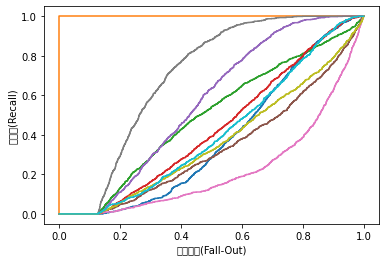

In [ ]:
fpr = [None] * num_classes #MNIST 정의한 class갯수(num_classes)
tpr = [None] * num_classes
thr = [None] * num_classes

for i in range(num_classes):
    #model = model.fit(X, y[:, i])
    #model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test_cate))
    fpr[i], tpr[i], thr[i] = roc_curve(y_bin[:, i], model.predict_proba(x_test)[:, 1])
    plt.plot(fpr[i], tpr[i])
    print('i:', i , ' ,auc:', auc(fpr[i], tpr[i]))

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()


In [ ]:
pre_y = np.argmax(model.predict(x_test), axis=-1)
result_dic = {}
for idx, pre_label in enumerate(pre_y):
    if y_test[idx] == pre_label : 
        if y_test[idx] not in result_dic:
            result_dic[y_test[idx]] = [1, 0]
        else:
            result = result_dic[y_test[idx]]
            result = [result[0]+1, result[1]] #정답인 경우 +1 저장
            result_dic[y_test[idx]] = result
    else:
        if y_test[idx] not in result_dic:
            result_dic[y_test[idx]] = [0, 1]
        else:
            result = result_dic[y_test[idx]]
            result = [result[0], result[1]+1] #오답인 경우 +1 저장
            result_dic[y_test[idx]] = result

for key in result_dic.keys():
    result = result_dic[key]
    print('key:', key, ' ,corr/err:', result_dic[key], ' ,per:', result[0]/(result[0]+result[1]))

key: 7  ,corr/err: [1018, 10]  ,per: 0.9902723735408561
key: 2  ,corr/err: [1023, 9]  ,per: 0.9912790697674418
key: 1  ,corr/err: [1133, 2]  ,per: 0.9982378854625551
key: 0  ,corr/err: [978, 2]  ,per: 0.9979591836734694
key: 4  ,corr/err: [975, 7]  ,per: 0.9928716904276986
key: 9  ,corr/err: [992, 17]  ,per: 0.9831516352824579
key: 5  ,corr/err: [879, 13]  ,per: 0.9854260089686099
key: 6  ,corr/err: [949, 9]  ,per: 0.9906054279749478
key: 3  ,corr/err: [1005, 5]  ,per: 0.995049504950495
key: 8  ,corr/err: [964, 10]  ,per: 0.9897330595482546
